**Voy a realizar un modelo de clasificación para saber qué tipo de usuario accede al sistema.**

I am going to carry out a classification model to know what type of user accesses the system.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from sklearn import svm
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [31]:
# importo el archivo
# importing the file.
df = pd.read_csv('C:/remaining_behavior_ext.csv')
df.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,0,024aae60-1a81-3f37-bbe6-3f832c919706,7.010387,0.419355,31.0,13040,default,outlier,outlier,1.0,1.0,13.0,E
1,1,028d67dd-c6d0-329f-a20e-78db9eab7a55,51.419393,0.252336,107.0,330113,default,outlier,outlier,1.0,1.0,27.0,E
2,2,02d12bf9-5fe2-3d0c-b233-30e02224b686,25.860775,0.275000,40.0,62066,default,outlier,outlier,1.0,1.0,11.0,E
3,3,0b3aee1e-dc3b-3728-bc55-f57a23446b3d,0.205909,0.818182,11.0,136,default,outlier,outlier,1.0,1.0,9.0,E
4,4,0dbfffb4-3ed4-3cb2-904d-c348501a996e,0.122125,0.812500,16.0,118,default,outlier,outlier,1.0,1.0,13.0,E


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34423 entries, 0 to 34422
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      34423 non-null  int64  
 1   _id                             34423 non-null  object 
 2   inter_api_access_duration(sec)  34422 non-null  float64
 3   api_access_uniqueness           34422 non-null  float64
 4   sequence_length(count)          34423 non-null  float64
 5   vsession_duration(min)          34423 non-null  int64  
 6   ip_type                         34423 non-null  object 
 7   behavior                        34423 non-null  object 
 8   behavior_type                   34423 non-null  object 
 9   num_sessions                    34423 non-null  float64
 10  num_users                       34423 non-null  float64
 11  num_unique_apis                 34423 non-null  float64
 12  source                          

**voy a eliminar las variables menos importantes**

I'm going to remove the less important variables

In [33]:
df.drop(['_id','behavior'], axis=1)

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior_type,num_sessions,num_users,num_unique_apis,source
0,0,7.010387,0.419355,31.000000,13040,default,outlier,1.0,1.0,13.0,E
1,1,51.419393,0.252336,107.000000,330113,default,outlier,1.0,1.0,27.0,E
2,2,25.860775,0.275000,40.000000,62066,default,outlier,1.0,1.0,11.0,E
3,3,0.205909,0.818182,11.000000,136,default,outlier,1.0,1.0,9.0,E
4,4,0.122125,0.812500,16.000000,118,default,outlier,1.0,1.0,13.0,E
...,...,...,...,...,...,...,...,...,...,...,...
34418,34418,0.030952,0.016275,245.777778,4108,default,normal,99.0,9.0,36.0,F
34419,34419,2.300500,0.300000,30.000000,4141,private_ip,outlier,5.0,1.0,9.0,F
34420,34420,0.393229,0.044610,8.966667,6347,default,normal,30.0,30.0,12.0,F
34421,34421,0.394731,0.166667,108.000000,2558,default,outlier,4.0,1.0,18.0,F


**genero las variables explicativas y la variable objetivo**

generating feature and label

In [34]:
feature_cols = ['inter_api_access_duration(sec)',
               'api_access_uniqueness',
               'sequence_length(count)',
               'vsession_duration(min)',
               'ip_type',
               'num_sessions',
               'num_users',
               'num_unique_apis',
               'source' 
               ]
label_col = ['behavior_type']
X = df[feature_cols]
Y = df[label_col]

In [35]:
X.describe()

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,34422.000000,34422.000000,34423.000000,3.442300e+04,34423.000000,34423.000000,34423.000000
mean,20.548672,0.444437,65.140736,2.960553e+04,9.880022,3.615432,15.491851
std,77.845323,0.302303,150.605273,7.987217e+04,65.043625,10.520912,15.356068
min,0.000000,0.000714,0.000000,0.000000e+00,1.000000,1.000000,0.000000
25%,0.381705,0.190476,6.666667,5.430000e+02,1.000000,1.000000,5.000000
50%,2.205273,0.384615,15.000000,5.972000e+03,1.000000,1.000000,10.000000
75%,9.495604,0.666667,58.000000,2.505650e+04,3.000000,2.000000,21.000000
max,2333.627333,1.000000,2800.000000,2.787530e+06,1462.000000,219.000000,178.000000


**creo las columnas dummies para las variables categóricas**

Generating dummies columns for categorical variables

In [36]:
df_X = pd.get_dummies(data=X, drop_first = True)
columns_dummies = df_X.columns.values
df_X.head()

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,ip_type_default,ip_type_google_bot,ip_type_private_ip,source_F
0,7.010387,0.419355,31.0,13040,1.0,1.0,13.0,1,0,0,0
1,51.419393,0.252336,107.0,330113,1.0,1.0,27.0,1,0,0,0
2,25.860775,0.275000,40.0,62066,1.0,1.0,11.0,1,0,0,0
3,0.205909,0.818182,11.0,136,1.0,1.0,9.0,1,0,0,0
4,0.122125,0.812500,16.0,118,1.0,1.0,13.0,1,0,0,0


**defino train/test**

generating train/test

In [37]:
# definimos los criterios de entrenamiento y test
# defining the training / test criteria
X_train, X_test, y_train, y_test = train_test_split(df_X,Y, test_size = 0.3, random_state = 101)
# para evitar mensaje de error conforme hay infinito o nan en X
# to avoid error message as there infinity or nan in X
X_train= X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test= X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24096, 11)
(10327, 11)
(24096, 1)
(10327, 1)


**genero el modelo**

creating the model

In [38]:
# modelo de árbol de decisión
# decission tree model
dtc = DecisionTreeClassifier()
# entrenamos el modelo
# training the model
dtc = dtc.fit(X_train, y_train)
# realizamos las predicciones
# generating predictions
y_pred_dtc = dtc.predict(X_test)

**genero la matriz de confusión**

generating confusion matrix

C:\Users\imber\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


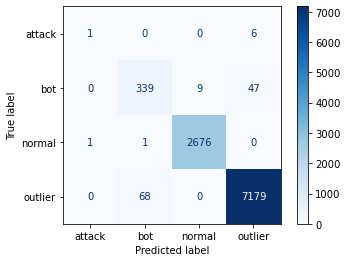

In [39]:
# matriz de confusión
# confusion matrix
disp = plot_confusion_matrix(dtc, X_test, y_test, cmap = plt.cm.Blues)

In [40]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

      attack       0.50      0.14      0.22         7
         bot       0.83      0.86      0.84       395
      normal       1.00      1.00      1.00      2678
     outlier       0.99      0.99      0.99      7247

    accuracy                           0.99     10327
   macro avg       0.83      0.75      0.76     10327
weighted avg       0.99      0.99      0.99     10327



**validación cruzada**

cross validation

In [41]:
# realizo la validación cruzada
# generating cross validation
kf = KFold(n_splits=5)
score = cross_val_score(dtc, X_train, y_train.values.ravel(), cv = kf)
score_mean = score.mean().round(2)
print(score_mean)

0.99


**Optimizo los parámetros**

Optimizing the parameters

In [42]:
# buscamos los mejores parámetros
# searching the best parameters
dtc = DecisionTreeClassifier()
# definimos los parámetros
# defining the parameters
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth = [2,3,5,10,20]
min_samples_split = [5,10,20,50,100]
min_samples_leaf = [5,10,20,50,100]
# definimos la red de búsqueda
# defining grid search
grid = dict(criterion = criterion,
           splitter = splitter,
           max_depth = max_depth,
           min_samples_split = min_samples_split,
           min_samples_leaf = min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
grid_search = GridSearchCV(estimator = dtc,
                          param_grid = grid,
                          n_jobs = -1,
                          scoring = 'accuracy',
                          error_score = 0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())
# resumimos resultados
# summarizing results
print("los mejores parámetros: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

los mejores parámetros: 0.992447 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20, 'splitter': 'best'}


In [43]:
# utilizamos los mejores parámetros
# implementing the best parameters
dtc_2 = DecisionTreeClassifier(criterion = "entropy",
                              max_depth = 10,
                              min_samples_leaf = 10,
                              min_samples_split = 20,
                              splitter = "best")
# entrenamos el modelo
# fitting the model
dtc_2.fit(X_train, y_train.values.ravel())
# realizamos las predicciones
# realizing predictions
y_pred_dtc_2 = dtc_2.predict(X_test)
# obtenemos los datos
# summarizing results.
print(classification_report(y_test, y_pred_dtc_2))

              precision    recall  f1-score   support

      attack       0.50      0.29      0.36         7
         bot       0.95      0.84      0.89       395
      normal       1.00      1.00      1.00      2678
     outlier       0.99      1.00      0.99      7247

    accuracy                           0.99     10327
   macro avg       0.86      0.78      0.81     10327
weighted avg       0.99      0.99      0.99     10327



**como podemos observar ha mejorado la precisión de clasificación de bot y attack, manteniendo attack, normal y outlier y ha empeorado la de bot.**


As we can see, the bot and attack classification accuracy has improved, keeping attack, normal and outlier, and the bot has worsened.

**en cuanto a F-1 el modelo ha mejorado en attack y bot, el modelo es especialmente bueno en detectar normal y outlier, y es peor detectando ataques**


As for F-1, the model has improved in attack and bot, the model is especially good at detecting normal and outlier, and is worse at detecting attacks



C:\Users\imber\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


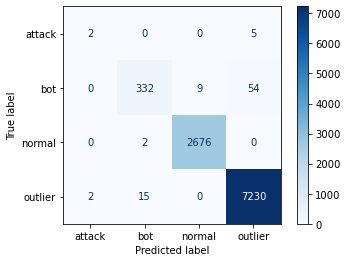

In [44]:
# imprimimos la matriz de confusión
# confusion matrix
disp = plot_confusion_matrix(dtc_2, X_test, y_test, cmap = plt.cm.Blues)

**Como podemos observar ha mejorado la clasificación de outlier y attack, se ha mantenido la del usuario normal, y ha empeorado la de bot.**

Como podemos observar ha mejorado la clasificación de outlier y attack, se ha mantenido la del usuario normal, y ha empeorado la de bot.

In [45]:
# realizo la validación cruzada
# generating cross validation
kf = KFold(n_splits=5)
score = cross_val_score(dtc_2, X_train, y_train.values.ravel(), cv = kf)
score_mean = score.mean().round(2)
print(score_mean)

0.99


**la validación cruzada mantiene el modelo en un 99%**

cross validation maintains the model at 99%